In [ ]:
import sys
sys.path.append('../../utils')
from utils import umap_refined

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (12,12)

import numpy as np
import scanpy as sc

from matplotlib import pyplot as plt

import matplotlib.patheffects as path_effects


/home/macera/.conda/envs/scanpy/lib/python3.9/site-packages/scvi/__init__.py:31: DeprecationWarning: scvi is deprecated, please uninstall scvi via `pip uninstall scvi` and install the new scvi-tools package at github.com/YosefLab/scvi-tools
  warnings.warn(deprecation_msg, DeprecationWarning)
/home/macera/.conda/envs/scanpy/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/macera/.conda/envs/scanpy/lib/python3.9/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/macera/.conda/envs/scanpy/lib/python3.9/site-packages/seaborn/cm.py:1582: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instea

In [2]:
l1_colors = {
'ATL': '#1f77b4',
  'PT_VCAM1': '#c5b0d5',
  'aPT': '#c5b0d5',
 'CNT': '#ff7f0e',
 'DCT': '#279e68',
  'DCT1': '#279e68',
 'DCT2': '#ffb500',
 'DTL': '#d62728',
 'EC': '#aa40fc',
 'ENDO': '#aa40fc',
 'FIB': '#8c564b',
 'IC': '#e377c2',
 'ICA': '#e377c2',
 'ica': '#e377c2',
 'icb': '#7b4f4b',
 'ICB': '#7b4f4b',
 'IMM': '#b5bd61',
 'LEUK': '#b5bd61',
 'NEU': '#c5b0d5',
 'TL': '#ffb500',
 'PC': '#aec7e8',
 'pc': '#aec7e8',
 'PEC': '#17becf',
 'POD': '#98df8a',
 'PODO': '#98df8a',
'PT': '#ff9896',
 'PapE': '#c5b0d5',
 'TAL': '#c49c94',
'MES': '#f7b6d2',
 'VSM/P': '#f7b6d2',
 'VSM': '#f7b6d2',
 'Unclassified':'#d3d3d3'}

In [3]:
l3_colors = {
'ATL': '#ffff00',
 'B': '#1ce6ff',
 'C-TAL': '#ff34ff',
 'PC': '#aec7e8',
 'CCD-IC-A': '#ff4a46',
 'CCD-PC': '#008941',
 'CNT': '#006fa6',
 'CNT-IC-A': '#a30059',
 'CNT-PC': '#ffdbe5',
 'DCT1': '#7a4900',
 'DCT2': '#0000a6',
 'DTL': '#63ffac',
 'EC-AEA': '#b79762',
 'EC-AVR': '#004d43',
 'EC-DVR': '#8fb0ff',
 'EC-GC': '#997d87',
 'EC-LYM': '#5a0007',
 'EC-PTC': '#809693',
 'FIB': '#6a3a4c',
 'IC-B': '#1b4400',
 'IMCD': '#4fc601',
 'M-FIB': '#3b5dff',
 'M-TAL': '#4a3b53',
 'MAC-M2': '#ff2f80',
 'MAST': '#61615a',
 'MC': '#ba0900',
 'MD': '#6b7900',
 'MDC': '#00c2a0',
 'MYOF': '#ffaa92',
 'N': '#ff90c9',
 'NEU': '#b903aa',
 'NKC/T': '#d16100',
 'OMCD-IC-A': '#ddefff',
 'OMCD-PC': '#000035',
 'PEC': '#7b4f4b',
 'PL': '#a1c299',
 'POD': '#300018',
 'PT-S1/2': '#0aa6d8',
 'PT-S3': '#013349',
 'PapE': '#00846f',
 'REN': '#372101',
 'T': '#ffb500',
 'VSMC': '#c2ffed',
 'VSMC/P': '#a079bf',
 'aFIB': '#cc0744',
 'aPT': '#c0b9b2',
 'aTAL1': '#c2ff99',
 'aTAL2': '#001e09',
 'cDC': '#00489c',
 'cycCNT': '#6f0062',
 'cycDCT': '#0cbd66',
 'cycEC': '#eec3ff',
 'cycMNP': '#456d75',
 'cycMYOF': '#b77b68',
 'cycNKC/T': '#7a87a1',
 'cycPT': '#788d66',
 'dC-IC-A': '#885578',
 'dC-TAL': '#fad09f',
 'dCNT': '#ff8a9a',
 'dDCT': '#d157a0',
 'dEC': '#bec459',
 'dEC-PTC': '#456648',
 'dFIB': '#0086ed',
 'dIMCD': '#886f4c',
 'dM-FIB': '#34362d',
 'dM-TAL': '#b4a8bd',
 'dOMCD-PC': '#00a6aa',
 'dPT': '#452c2c',
 'dVSMC': '#636375',
 'ncMON': '#a3c8c9',
 'pDC': '#ff913f',
 'tPC-IC': '#938a81','Unclassified':'#d3d3d3'}

In [ ]:
data = sc.read('../HORIZONTAL_RNA/objects/RNA_STWG_final.h5ad', compression='gzip')

#### Select the reference that get the highest match with out set of RNA genes

In [ ]:
ensembl_version_dict = {'105': 'http://www.ensembl.org',
                        '104': 'http://may2021.archive.ensembl.org/',
                        '103': 'http://feb2021.archive.ensembl.org/',
                        '102': 'http://nov2020.archive.ensembl.org/',
                        '101': 'http://aug2020.archive.ensembl.org/',                        
                        '100': 'http://apr2020.archive.ensembl.org/',
                        '99': 'http://jan2020.archive.ensembl.org/',
                        '98': 'http://sep2019.archive.ensembl.org/',
                        '97': 'http://jul2019.archive.ensembl.org/',
                        '96': 'http://apr2019.archive.ensembl.org/',
                        '95': 'http://jan2019.archive.ensembl.org/',
                        '94': 'http://oct2018.archive.ensembl.org/',
                        '93': 'http://jul2018.archive.ensembl.org/',                        
                        '92': 'http://apr2018.archive.ensembl.org/',
                        '91': 'http://dec2017.archive.ensembl.org/',
                        '90': 'http://aug2017.archive.ensembl.org/',
                        '89': 'http://may2017.archive.ensembl.org/',      
                        '88': 'http://mar2017.archive.ensembl.org/',
                        '87': 'http://dec2016.archive.ensembl.org/',
                        '86': 'http://oct2016.archive.ensembl.org/',
                        '80': 'http://may2015.archive.ensembl.org/',
                        '77': 'http://oct2014.archive.ensembl.org/',
                        '75': 'http://feb2014.archive.ensembl.org/',
                        '54': 'http://may2009.archive.ensembl.org/'}
    
import pybiomart as pbm
def test_ensembl_host(scplus_obj, host, species):
    dataset = pbm.Dataset(name=species+'_gene_ensembl',  host=host)
    annot = dataset.query(attributes=['chromosome_name', 'transcription_start_site', 'strand', 'external_gene_name', 'transcript_biotype'])
    annot.columns = ['Chromosome', 'Start', 'Strand', 'Gene', 'Transcript_type']
    annot['Chromosome'] = annot['Chromosome'].astype('str')
    filter = annot['Chromosome'].str.contains('CHR|GL|JH|MT')
    annot = annot[~filter]
    annot.columns=['Chromosome', 'Start', 'Strand', 'Gene', 'Transcript_type']
    gene_names_release = set(annot['Gene'].tolist())

    ov=len([x for x in scplus_obj.var_names if x in gene_names_release])
    print('Genes recovered: ' + str(ov) + ' out of ' + str(len(scplus_obj.var_names)))
    return ov

n_overlap = {}
for version in ensembl_version_dict.keys():
    print(f'host: {version}')
    try:
        n_overlap[version] =  test_ensembl_host(data, ensembl_version_dict[version], 'hsapiens')
    except:
        print('Host not reachable')
v = sorted(n_overlap.items(), key=lambda item: item[1], reverse=True)[0][0]
print(f"version: {v} has the largest overlap, use {ensembl_version_dict[v]} as biomart host")

host: 105
Genes recovered: 23493 out of 38224
host: 104
Genes recovered: 23841 out of 38224
host: 103
Genes recovered: 36443 out of 38224
host: 102


/home/macera/.conda/envs/scanpy/lib/python3.9/site-packages/pybiomart/dataset.py:269: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  result = pd.read_csv(StringIO(response.text), sep='\t')


Genes recovered: 36534 out of 38224
host: 101
Genes recovered: 36706 out of 38224
host: 100
Genes recovered: 36971 out of 38224
host: 99
Genes recovered: 37086 out of 38224
host: 98
Genes recovered: 37381 out of 38224
host: 97
Host not reachable
host: 96
Genes recovered: 35479 out of 38224
host: 95
Genes recovered: 35283 out of 38224
host: 94
Host not reachable
host: 93
Host not reachable
host: 92
Host not reachable
host: 91
Host not reachable
host: 90
Host not reachable
host: 89
Host not reachable
host: 88
Host not reachable
host: 87
Host not reachable
host: 86
Host not reachable
host: 80
Genes recovered: 23318 out of 38224
host: 77
Genes recovered: 22857 out of 38224
host: 75
Host not reachable
host: 54
Host not reachable
version: 98 has the largest overlap, use http://sep2019.archive.ensembl.org/ as biomart host


In [ ]:
# import scglue
import scanpy as sc


In [4]:
adata = sc.read('objects/GLUE_comb_emb_FINAL.h5ad')
data = adata
data

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 134842 × 0
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'AMULET_doublets', 'Deepscore_HCA_l1_Clean', 'Deepscore_HCA_l1_full', 'Deepscore_HCA_l1_Clean_score', 'Deepscore_HCA_l1_Full', 'Deepscore_HCA_l1_Full_score', 'Deepscore_HCA_l3_Clean', 'Deepscore_HCA_l3_Clean_score', 'Deepscore_HCA_l3_Full', 'Deepscore_HCA_l3_Full_score', 'Manual_Annotation_l1', 'Manual_Annotation_l2'
    uns: 'neighbors', 'umap'
    obsm: 'X_glue', 'X_pca', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [8]:
adata
adata.obs['modality'] = 'RNA'
adata.obs['len_barcode'] = [len(i.split('-')) for i in adata.obs.index]
adata.obs.loc[adata[adata.obs['len_barcode'].isin([2])].obs.index, 'modality'] = 'ATAC'

adata.obs['Technology'] = [i.split('-')[-1] for i in adata.obs.index] 
adata.obs.loc[adata[adata.obs['len_barcode'].isin([2])].obs.index, 'Technology'] = 'snATAC'
adata.obs['Technology'].unique()

array(['snRNA', 'scRNA', 'scRNA5p', 'snATAC'], dtype=object)

In [11]:
adata.obs['batch'] = adata.obs['Technology']

In [12]:
color_dict = {
    'Global RNA Horizontal': '#d62728',
    "scRNA 3'": '#1f77b4',
    "scRNA 5'": '#ff7f0e',
    'scMultiome-RNA': '#2ca02c',
    'scMultiome-ATAC': '#8c564b', 
    'scMultiome-Paired': '#000000',
    'Global Multimodal Mosaic': '#e377c2',
    'Global Multimodal Diagonal': '#17becf'
}

In [13]:

rename_dict = {'scRNA': "scRNA 3'", 'scRNA5p': "scRNA 5'", 'snRNA':  'scMultiome-RNA',
    'snATAC':'scMultiome-ATAC', 'snMulti':'scMultiome-Paired',}
adata.obs['batch'] = adata.obs['batch'].replace(rename_dict)

In [8]:
adata = data

/home/macera/.conda/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


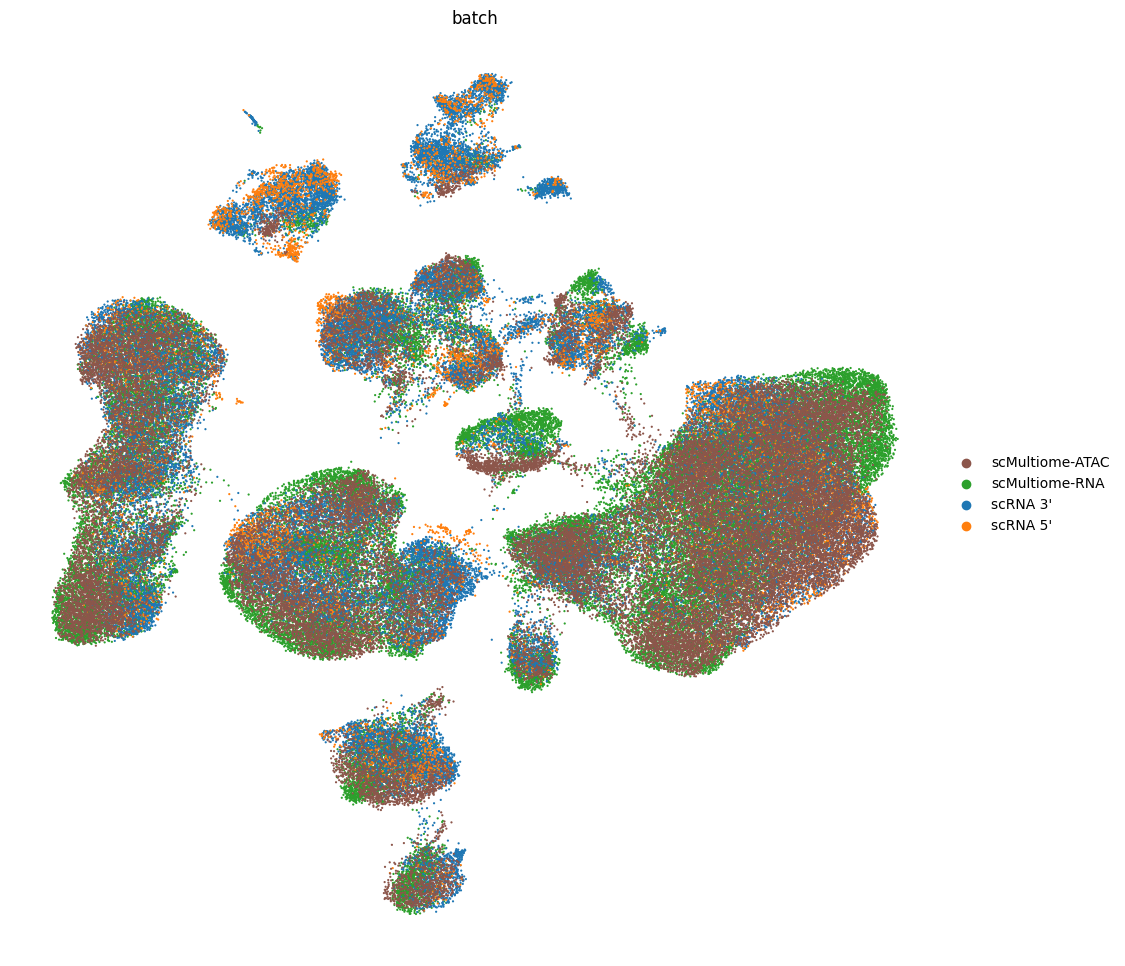

In [14]:
sc.pl.umap(adata, color = 'batch',palette = color_dict, size = 10, frameon=False, show=False)
plt.savefig('figures/GLUE_batch.png', dpi = 300, bbox_inches = 'tight')

Figure size= (14, 14) dpi= 100.0 Scale factor = 35.22001889469002


/home/macera/.conda/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/tmp/ipykernel_5005/3157890740.py:114: RuntimeWarning: invalid value encountered in divide
  norm_direction = direction / np.linalg.norm(direction)


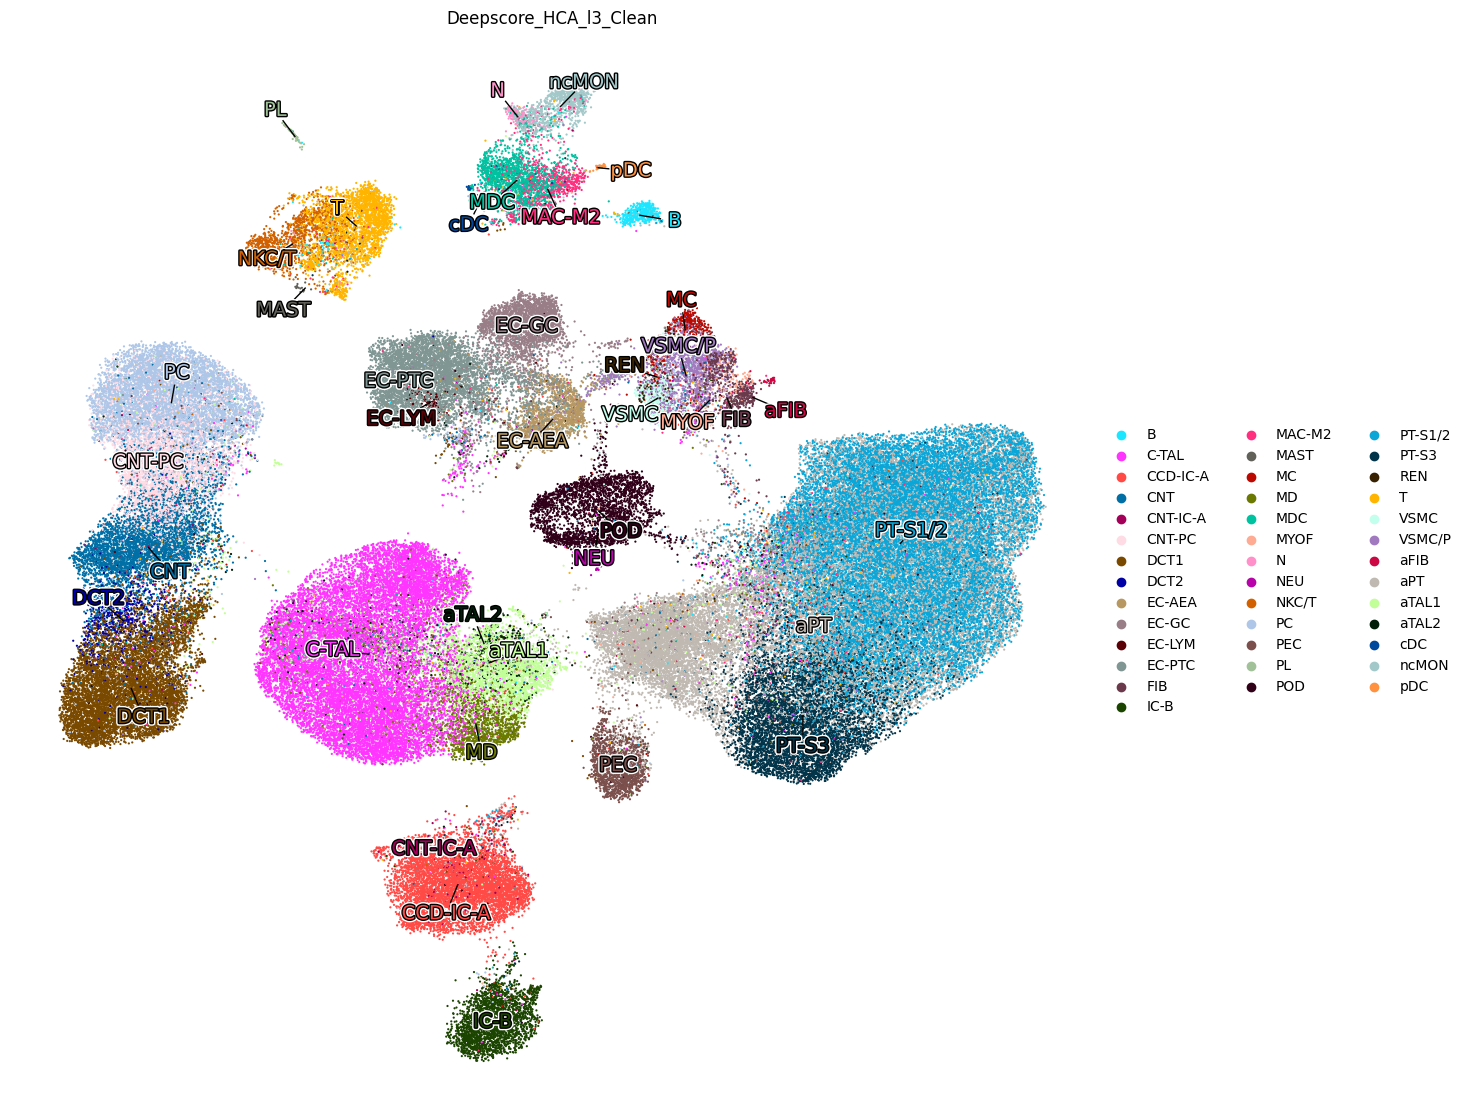

In [17]:
latent = 'GLUE'
for ann in ['Deepscore_HCA_l3_Clean']:
    adata.uns[f'{ann}_colors'] = [l3_colors[i] for i in adata.obs[ann].cat.categories]
    umap_refined(adata,
                umap = f'X_umap',
                var = ann,
                size= 10,
                label_size = 45 * (50/len(adata.obs[ann].unique())),
                width_in_inches = 14,
                height_in_inches = 14,
                max_iterations=25)
    # plt.savefig(f'../DEEPSCORE/figures/umaps/{ann}.png',  bbox_inches='tight', dpi=300)
    plt.savefig(f'figures/UMAP_{ann}_{latent}.png',  bbox_inches='tight', dpi=300)

Figure size= (12, 12) dpi= 100.0 Scale factor = 30.18858762402002


/home/macera/.conda/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/tmp/ipykernel_5005/3157890740.py:114: RuntimeWarning: invalid value encountered in divide
  norm_direction = direction / np.linalg.norm(direction)


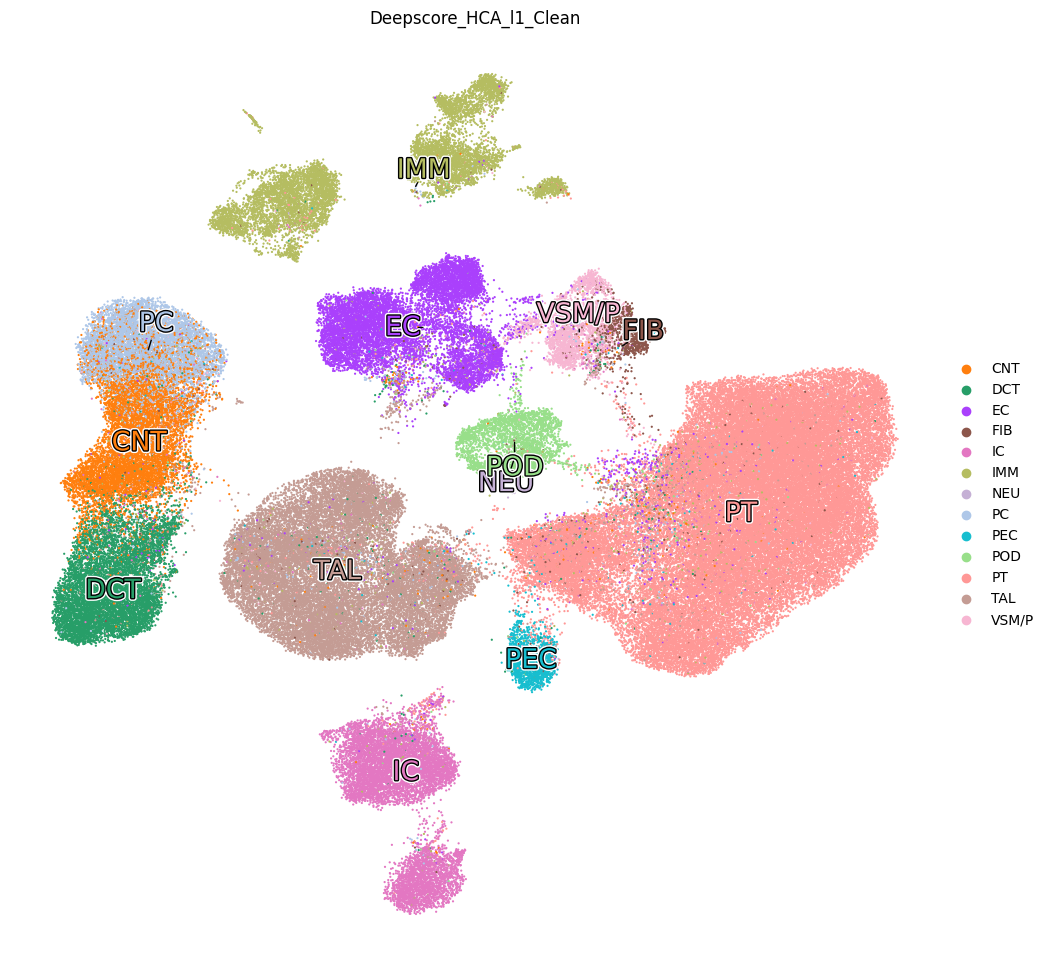

In [18]:
latent = 'GLUE'
for ann in ['Deepscore_HCA_l1_Clean']:
    adata.uns[f'{ann}_colors'] = [l1_colors[i] for i in adata.obs[ann].cat.categories]
    umap_refined(adata,
                umap = f'X_umap',
                var = ann,
                size= 10,
                label_size = 20 * (50/len(adata.obs[ann].unique())),
                width_in_inches = 12,
                height_in_inches = 12,
                max_iterations=4)
    # plt.savefig(f'../DEEPSCORE/figures/umaps/{ann}.png',  bbox_inches='tight', dpi=300)
    plt.savefig(f'figures/UMAP_{ann}_{latent}.png',  bbox_inches='tight', dpi=300)